<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(3_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.214523,74.323571,69.460267,96.516671,2915.605899,3249.120931,618.233868,2630.887063
1,0.0,1.0,26.621668,40.206809,55.976722,35.796158,-831.405762,-662.804405,-692.084250,29.279845
2,0.0,2.0,34.339825,62.923957,84.717812,44.349640,-1594.382797,-1358.051563,-510.126846,-847.924717
3,0.0,3.0,44.446091,41.015503,27.192041,23.009599,-753.078660,-607.415427,-679.157677,71.742251
4,0.0,4.0,23.525563,29.309520,69.044040,75.029601,-321.085992,-114.177268,-228.491821,114.314553
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,94.330046,91.921060,40.547337,81.958991,294.342305,613.099739,-332.145297,945.245036
59996,999.0,56.0,58.281962,51.323418,63.392267,81.296814,-1118.436257,-854.141797,33.485610,-887.627407
59997,999.0,57.0,84.703580,29.534769,45.542064,89.683372,-551.133459,-291.669674,-195.795310,-95.874364
59998,999.0,58.0,62.124815,84.412766,62.263476,61.903694,-2930.135363,-2649.430612,174.612173,-2824.042785


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    83.214523  74.323571  69.460267  96.516671  2915.605899   
      1.0    26.621668  40.206809  55.976722  35.796158  -831.405762   
      2.0    34.339825  62.923957  84.717812  44.349640 -1594.382797   
      3.0    44.446091  41.015503  27.192041  23.009599  -753.078660   
      4.0    23.525563  29.309520  69.044040  75.029601  -321.085992   
...                ...        ...        ...        ...          ...   
999.0 55.0   94.330046  91.921060  40.547337  81.958991   294.342305   
      56.0   58.281962  51.323418  63.392267  81.296814 -1118.436257   
      57.0   84.703580  29.534769  45.542064  89.683372  -551.133459   
      58.0   62.124815  84.412766  62.263476  61.903694 -2930.135363   
      59.0   20.731125  89.710744  64.930015  43.098367   613.985454   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    3249.120931  618.233868  2630.887063  
      1.0    -662.804405 -692.084250    29.279845  
      2.0   -1358.051563 -510.126846  -847.924717  
      3.0    -607.415427 -679.157677    71.742251  
      4.0    -114.177268 -228.491821   114.314553  
...                  ...         ...          ...  
999.0 55.0    613.099739 -332.145297   945.245036  
      56.0   -854.141797   33.485610  -887.627407  
      57.0   -291.669674 -195.795310   -95.874364  
      58.0  -2649.430612  174.612173 -2824.042785  
      59.0    842.455706  647.128039   195.327667  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    83.214523  74.323571  69.460267  96.516671  2915.605899   
      1.0    26.621668  40.206809  55.976722  35.796158  -831.405762   
      2.0    34.339825  62.923957  84.717812  44.349640 -1594.382797   
      3.0    44.446091  41.015503  27.192041  23.009599  -753.078660   
      4.0    23.525563  29.309520  69.044040  75.029601  -321.085992   
...                ...        ...        ...        ...          ...   
999.0 55.0   94.330046  91.921060  40.547337  81.958991   294.342305   
      56.0   58.281962  51.323418  63.392267  81.296814 -1118.436257   
      57.0   84.703580  29.534769  45.542064  89.683372  -551.133459   
      58.0   62.124815  84.412766  62.263476  61.903694 -2930.135363   
      59.0   20.731125  89.710744  64.930015  43.098367   613.985454   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    3249.120931  618.233868  2630.887063  
      1.0    -662.804405 -692.084250    29.279845  
      2.0   -1358.051563 -510.126846  -847.924717  
      3.0    -607.415427 -679.157677    71.742251  
      4.0    -114.177268 -228.491821   114.314553  
...                  ...         ...          ...  
999.0 55.0    613.099739 -332.145297   945.245036  
      56.0   -854.141797   33.485610  -887.627407  
      57.0   -291.669674 -195.795310   -95.874364  
      58.0  -2649.430612  174.612173 -2824.042785  
      59.0    842.455706  647.128039   195.327667  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.214523,74.323571,69.460267,96.516671,2915.605899,3249.120931,618.233868,2630.887063
1,0.0,1.0,26.621668,40.206809,55.976722,35.796158,-831.405762,-662.804405,-692.084250,29.279845
2,0.0,2.0,34.339825,62.923957,84.717812,44.349640,-1594.382797,-1358.051563,-510.126846,-847.924717
3,0.0,3.0,44.446091,41.015503,27.192041,23.009599,-753.078660,-607.415427,-679.157677,71.742251
4,0.0,4.0,23.525563,29.309520,69.044040,75.029601,-321.085992,-114.177268,-228.491821,114.314553
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,94.330046,91.921060,40.547337,81.958991,294.342305,613.099739,-332.145297,945.245036
59996,999.0,56.0,58.281962,51.323418,63.392267,81.296814,-1118.436257,-854.141797,33.485610,-887.627407
59997,999.0,57.0,84.703580,29.534769,45.542064,89.683372,-551.133459,-291.669674,-195.795310,-95.874364
59998,999.0,58.0,62.124815,84.412766,62.263476,61.903694,-2930.135363,-2649.430612,174.612173,-2824.042785


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    83.214523  74.323571  69.460267  96.516671  2915.605899   
      1.0    26.621668  40.206809  55.976722  35.796158  -831.405762   
      2.0    34.339825  62.923957  84.717812  44.349640 -1594.382797   
      3.0    44.446091  41.015503  27.192041  23.009599  -753.078660   
      4.0    23.525563  29.309520  69.044040  75.029601  -321.085992   
...                ...        ...        ...        ...          ...   
999.0 55.0   94.330046  91.921060  40.547337  81.958991   294.342305   
      56.0   58.281962  51.323418  63.392267  81.296814 -1118.436257   
      57.0   84.703580  29.534769  45.542064  89.683372  -551.133459   
      58.0   62.124815  84.412766  62.263476  61.903694 -2930.135363   
      59.0   20.731125  89.710744  64.930015  43.098367   613.985454   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    3249.120931  618.233868  2630.887063  
      1.0    -662.804405 -692.084250    29.279845  
      2.0   -1358.051563 -510.126846  -847.924717  
      3.0    -607.415427 -679.157677    71.742251  
      4.0    -114.177268 -228.491821   114.314553  
...                  ...         ...          ...  
999.0 55.0    613.099739 -332.145297   945.245036  
      56.0   -854.141797   33.485610  -887.627407  
      57.0   -291.669674 -195.795310   -95.874364  
      58.0  -2649.430612  174.612173 -2824.042785  
      59.0    842.455706  647.128039   195.327667  

[60000 rows x 8 columns]

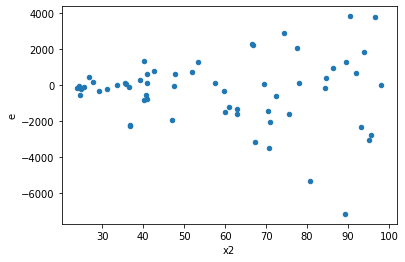

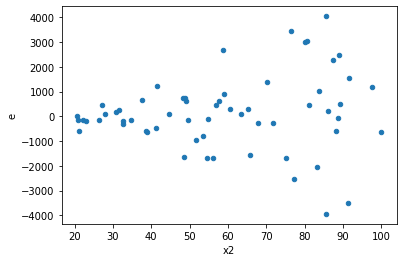

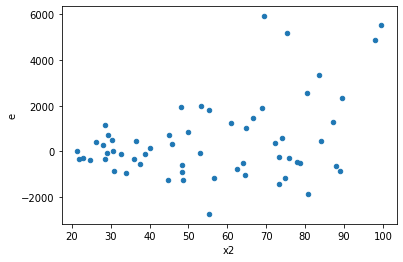

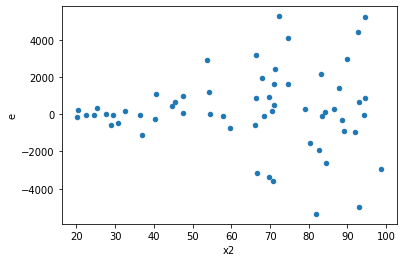

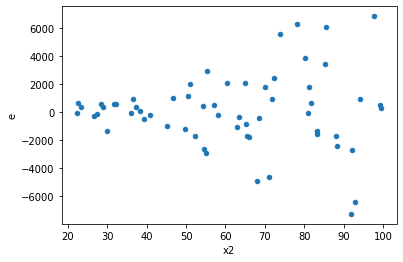

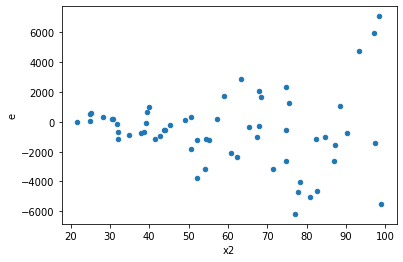

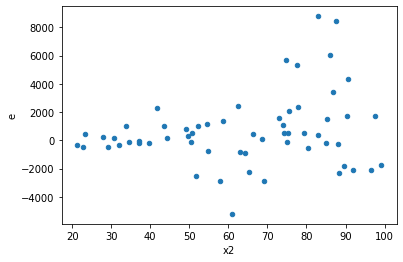

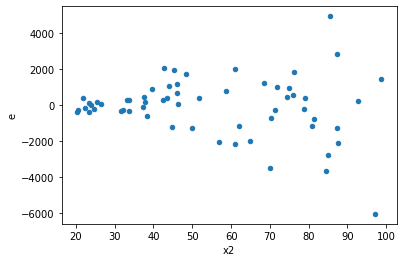

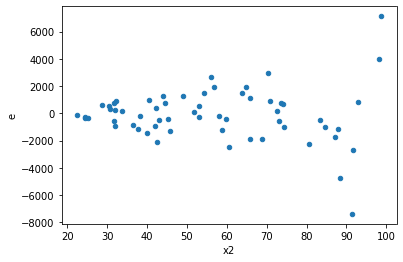

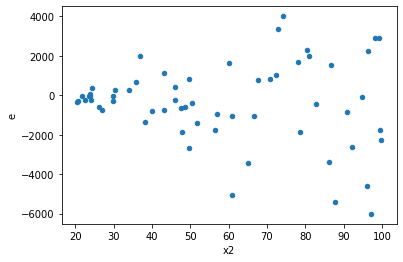

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,23.0,29.0,30414039.940818522,73155187.40549748,1322349.5626442835,2522592.6691550855,1.907659472515492,0.10071357594322894,0.9496432120283855,0.05035678797161447,Reject001=1 : Homoscedasticity
2.0,28.0,24.0,28887149.223896503,44432052.31121516,1031683.9008534466,1851335.5129672985,1.7944794054029594,0.14953760680580008,0.9252311965971,0.07476880340290004,Reject001=1 : Homoscedasticity
7.0,28.0,24.0,40907908.134853266,60462102.955789216,1460996.7191019023,2519254.2898245505,1.7243394573624886,0.17892698884935876,0.9105365055753206,0.08946349442467938,Reject001=1 : Homoscedasticity
10.0,22.0,30.0,50143251.839084424,81993854.0486182,2279238.719958383,2733128.4682872733,1.1991409431378814,0.6345408531787844,0.6827295734106078,0.3172704265893922,Reject001=1 : Homoscedasticity
13.0,27.0,25.0,11013342.737014478,75032023.66150872,407901.5828523881,3001280.946460349,7.357855602012842,3.459900556945783e-06,0.9999982700497215,1.7299502784728915e-06,Reject001=0 : Heteroscedasticity
17.0,25.0,27.0,36231351.0082032,83831601.02272081,1449254.040328128,3104874.111952623,2.1423946565293983,0.05558304379975176,0.9722084781001241,0.02779152189987588,Reject001=1 : Homoscedasticity
19.0,37.0,15.0,75783270.78831193,123835249.92297816,2048196.5077922144,8255683.328198544,4.030708624289905,0.0055432729133637615,0.9972283635433181,0.0027716364566818807,Reject001=0 : Heteroscedasticity
21.0,19.0,33.0,28451198.885929342,130941257.32474415,1497431.5203120706,3967916.8886286104,2.6498152568617503,0.013687373584051032,0.9931563132079745,0.006843686792025516,Reject001=1 : Homoscedasticity
22.0,24.0,28.0,13552013.865581265,219216865.81503877,564667.2443992194,7829173.779108527,13.865110570453608,1.1237140107311916e-09,0.999999999438143,5.618570053655958e-10,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,31.0,94550052.17687565,83862671.92177464,4502383.436994079,2705247.4813475693,0.6008478662922745,0.22622888693804574,Reject001=1 : Homoscedasticity
1.0,23.0,29.0,30414039.940818522,73155187.40549748,1322349.5626442835,2522592.6691550855,1.907659472515492,0.10071357594322894,Reject001=1 : Homoscedasticity
2.0,28.0,24.0,28887149.223896503,44432052.31121516,1031683.9008534466,1851335.5129672985,1.7944794054029594,0.14953760680580008,Reject001=1 : Homoscedasticity
3.0,29.0,23.0,145524148.10495046,91408930.49642807,5018074.072584499,3974301.3259316552,0.7919973416982143,0.5470919057259346,Reject001=1 : Homoscedasticity
4.0,17.0,35.0,131509200.83000663,155593015.94133353,7735835.342941566,4445514.741180958,0.5746651194220666,0.2238815732131138,Reject001=1 : Homoscedasticity
5.0,34.0,18.0,275365735.75933045,62688445.57470591,8098992.228215601,3482691.420816995,0.4300154047171267,0.03317612232249005,Reject001=1 : Homoscedasticity
6.0,32.0,20.0,251031050.9207848,58871588.73404227,7844720.341274525,2943579.4367021136,0.37523064030908115,0.013013603607263476,Reject001=1 : Homoscedasticity
7.0,28.0,24.0,40907908.134853266,60462102.955789216,1460996.7191019023,2519254.2898245505,1.7243394573624886,0.17892698884935876,Reject001=1 : Homoscedasticity
8.0,29.0,23.0,149574910.25310835,43418324.40984734,5157755.525969254,1887753.235210754,0.3660028525403992,0.011311401644117917,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      617
Reject001=0 : Heteroscedasticity    383
Name: Result_test, dtype: int64